In [2]:
import matplotlib.pyplot as plt
import os
from scipy import signal
import numpy as np
from scipy.fftpack import fft,ifft
import pandas as pd
from pandas import DataFrame

In [3]:
def stft_plot(data):
    f, t, Zxx = signal.stft(data, fs=25600, nperseg=256)
    result = abs(Zxx)
    result = 20 * np.log10(result)
    result = np.clip(result, -100, 100)
    plt.figure(figsize=(64, 32))
    img = plt.imshow(result, origin='lower', cmap='jet', interpolation='none', aspect='auto')
    cbar = plt.colorbar(img)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('stft')
    plt.show()
def fft_plot(data):
    freqs=np.fft.fft(data)
    freqs=pd.to_numeric(freqs,errors='coerce')
    plt.figure(figsize=(32,6))
    plt.plot(range(len(freqs)),freqs,c='b')

    plt.show()


In [4]:
data_dire='../../01-TrainingData-qLua/01/Sensor'
file_dire='../../01-TrainingData-qLua/'

1


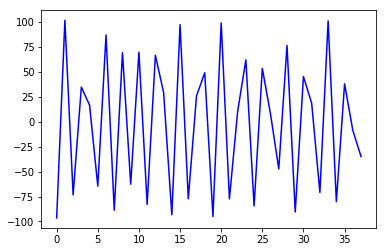

2


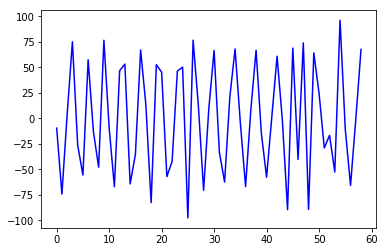

3


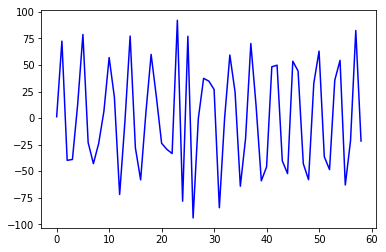

4


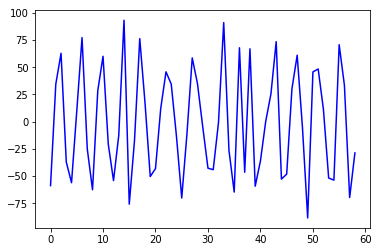

5


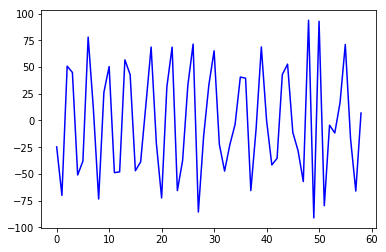

6


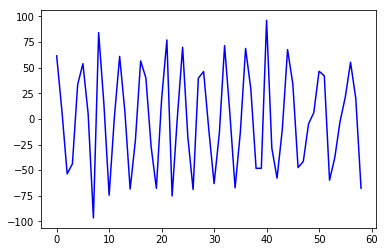

7


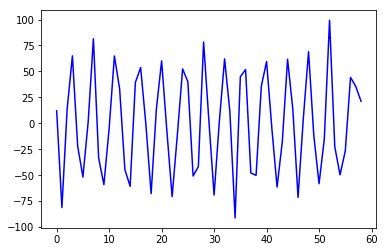

8


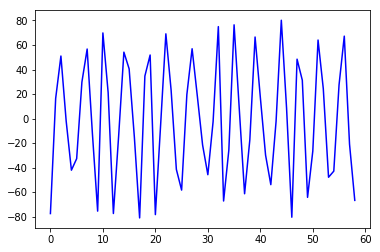

9


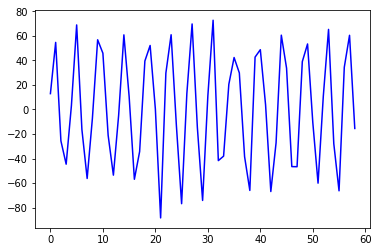

10


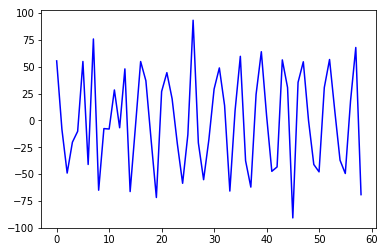

11


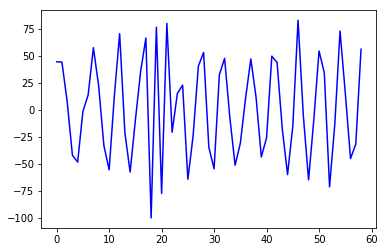

12


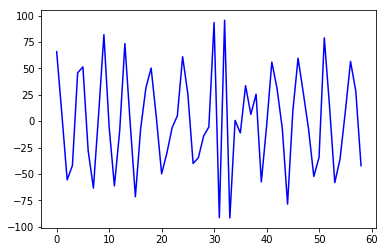

13


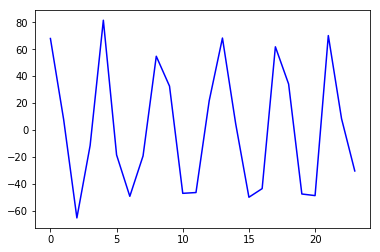

14


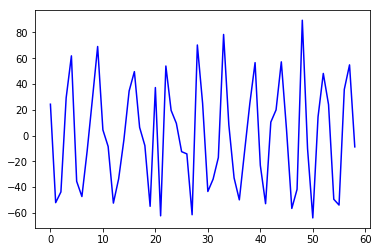

15


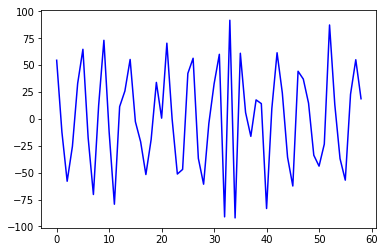

16


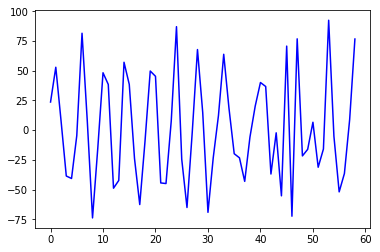

17


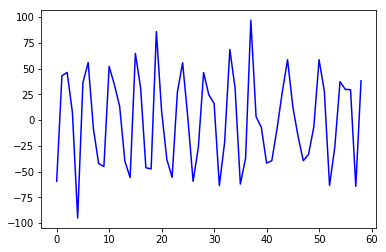

18


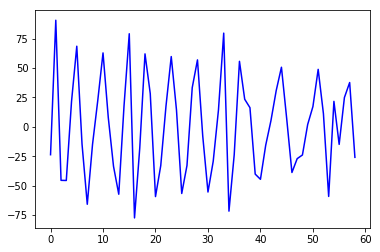

KeyboardInterrupt: 

In [18]:
# df_sensor=pd.read_csv(os.path.join(data_dire,'2.csv'))
# b, a = signal.butter(6, 0.06, 'low')# current 0.5; vibration 0.3
# low_pass_current = signal.filtfilt(b, a, df_sensor['vibration_3'])
# stft_plot(low_pass_current)
# fft_plot(low_pass_current[0:25600])

file_list=os.listdir(data_dire)
for index in range(1,len(file_list)):
    df_sensor=pd.read_csv(os.path.join(data_dire,str(index)+'.csv'))
    print(index)
    start=0
    end=1
    window=25600
    last_freqs=np.fft.fft(df_sensor['vibration_1'][window*start:window*end])
    err_list=[]
    for _ in range(1,df_sensor.shape[0]//25600):
        freqs=np.fft.fft(df_sensor['vibration_1'][window*_:window*(_+1)])
        err=np.mean((np.array(freqs)-np.array(last_freqs))) 
        err_list.append(err)
        last_freqs=freqs
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(range(len(err_list)),err_list,color='b')
    plt.show()



In [ ]:
file_list=os.listdir(data_dire)
mean_list=[]
var_list=[]
for _ in range(1,len(file_list)):
    print(_)
    df_sensor=pd.read_csv(os.path.join(data_dire,str(_)+'.csv'))
    b, a = signal.butter(6, 0.06, 'low')# current 0.5; vibration 0.3
    low_pass_current = signal.filtfilt(b, a, df_sensor['vibration_3'])
    mean_list.append(abs(low_pass_current).mean())
    var_list.append(abs(low_pass_current).var())
    

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,2,1)
ax.plot(range(len(mean_list)-1),mean_list[:-1],color='b')
bx=fig.add_subplot(1,2,2)
bx.plot(range(len(var_list)-1),var_list[:-1],color='r')
plt.show()